In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
shapleymtx = pd.read_pickle('shapleyNN.pkl')

In [17]:
print(shapleymtx[0].columns.tolist())

['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'dolvol', 'ill', 'zerotrade', 'baspread', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'sp', 'agr', 'nincr', 'return(t-1)', 'feature: dolvol', 'feature: baspred', 'feature: sp']


In [21]:
for i in range(8):
    shapleymtx[i] = shapleymtx[i].drop(columns = ['mom1m', 'mom12m', 'chmom', 'indmom', 'mom36m', 'turn', 'mvel1', 'dolvol', 'ill', 'zerotrade', 'baspread', 'retvol', 'idiovol', 'beta', 'betasq', 'ep', 'sp', 'agr', 'nincr', 'return(t-1)'])

### plan
for each feature: <br>
(x-axis: time/model; y-axis: value)<br>
  for each bin(industry, color code): <br>
    dots as individual shapley values
    line graph for average over time

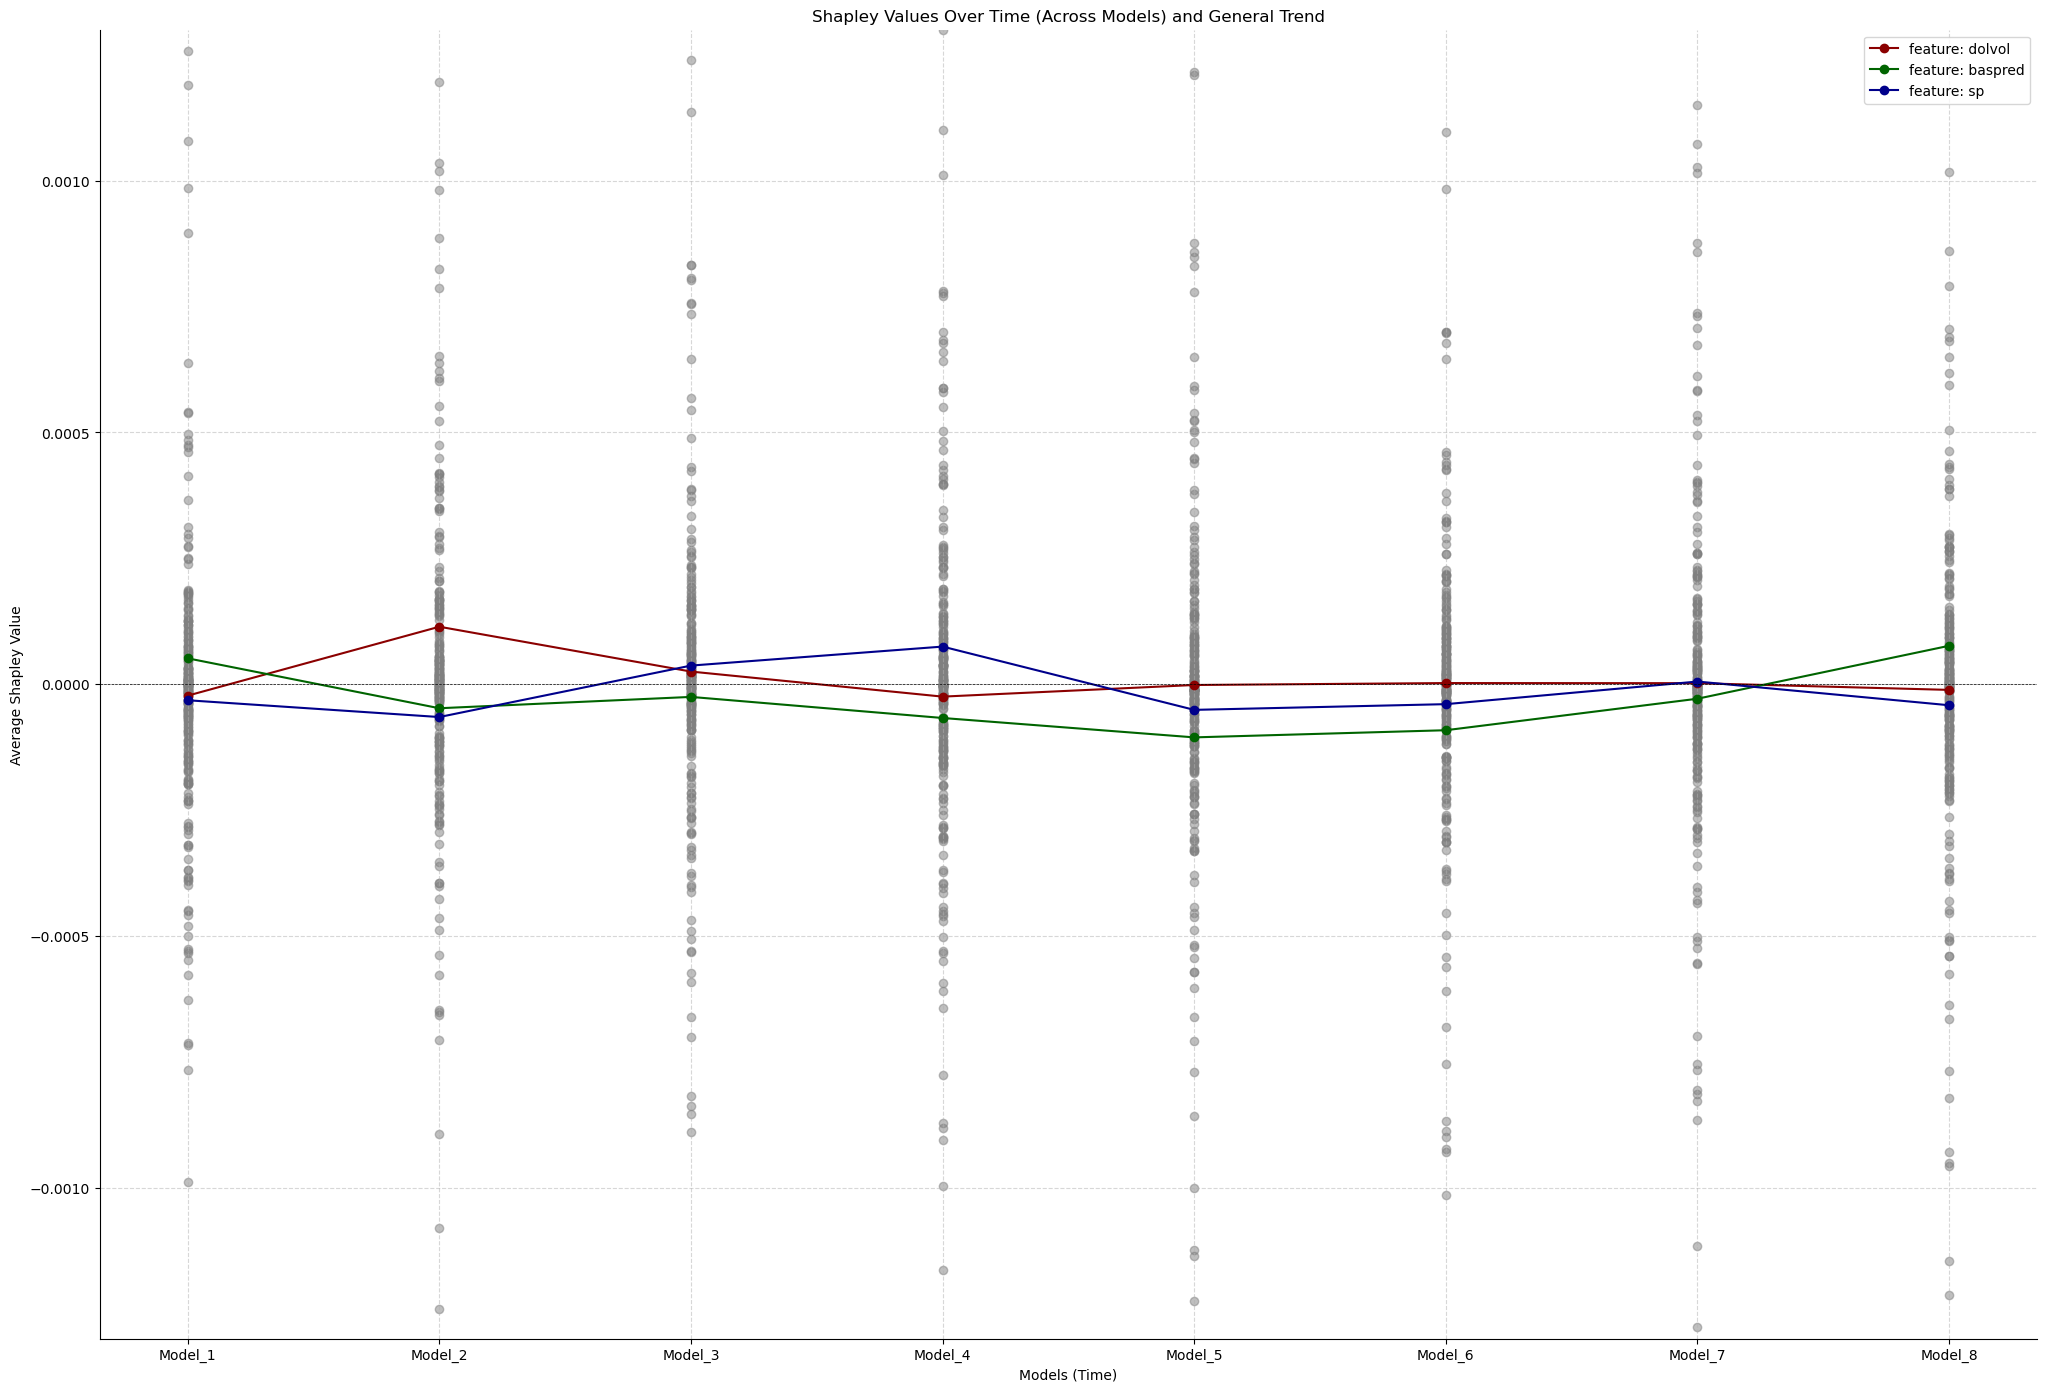

In [80]:
num_models = 8
num_samples = 10
num_features = 3

average_shap_values = []

for df in shapleymtx:
    shap_values = df
    features = shap_values.columns

    average_shap_values.append(shap_values.mean())   # average Shapley


plt.figure(figsize=(25, 17))

# plot individual shapley values
shap_values = np.stack([df.values for df in shapleymtx])
for feature_index in range(num_features):
    for model_index in range(num_models):
        plt.scatter([model_index] * 90, shap_values[model_index, :, feature_index], alpha=0.5, color='gray')


# plot average Shapley
colors = ['darkred', 'darkgreen', 'darkblue']
for i, feature in enumerate(features):
    # get the average shapley value of each feature and put them into a list
    plt.plot(range(num_models), [avg_shap[i] for avg_shap in average_shap_values], label=feature, marker='o', color = colors[i], linewidth=1.5)


plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    
plt.xlabel('Models (Time)')
plt.ylabel('Average Shapley Value')
plt.title('Shapley Values Over Time (Across Models) and General Trend')
plt.xticks(range(num_models), [f"Model_{i+1}" for i in range(num_models)])  # Label x-axis with model names
plt.legend()

plt.ylim(-0.0013, 0.0013)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
